<center><h1>Class Weights for BC1 Model</h1>
John Ignacio R.M. 30 Jun 2020</center>

In [1]:
#ada library
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada2.data import read_dataset, split_dataset, rotate_vectors
from ada2.model import BinClassifModelV1 as BC1
from ada2.plot import plot_confidence_matrix
import pandas as pd

Using TensorFlow backend.
Welcome to JupyROOT 6.20/04


In [2]:
source_path = "../processed_data/xtohh"
signal = "Xtohh2000"
bg = "Xtohh_background"
seed = 420

In [3]:
#read xtohh dataset SR 2
df = read_dataset(source_path, signal, bg, "SR", 2)
df

,EventWeight,label,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.001020,1,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.887240,1631.67020,263.697630
1,0.001117,1,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.033330,1293.40280,463.512360
2,0.000925,1,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.559220,1659.84830,80.008150
3,0.001158,1,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.607220,1075.30920,109.524925
4,0.001120,1,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.350300,1595.76110,244.283460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0.006433,0,402.06714,0.109710,-1.277847,68576.34,486.71262,-0.060529,1.469456,120999.410,2.747302,2.752572,-0.883233,84.210686,891.92240,192.862270
8802,0.004849,0,542.29900,1.579771,-2.624035,84161.26,411.07132,1.205967,0.438185,56194.777,3.062220,3.084951,-0.216563,59.169407,970.41110,136.471160
8803,0.004849,0,548.63104,-0.033452,2.621298,79095.04,416.03915,0.336025,-0.553298,70408.830,3.108589,3.130470,-0.352454,34.371227,983.20233,133.526060
8804,0.007816,0,683.98340,-0.029910,-0.760806,110728.80,609.47140,0.094448,2.401307,148632.220,3.121072,3.123549,0.351719,55.616740,1320.47700,75.680750


In [4]:
sets = split_dataset(df, *(0.6, 0.2, 0.2), seed)
sets["x"]["train"]

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,0.130367,0.444366,-0.742402,-1.667881,-0.481700,-0.821738,0.986630,-0.707962,0.286199,-0.060604,-0.308809,1.122165,-0.536045,0.343074
1,-0.154324,-0.757036,-1.493544,-0.589215,0.568245,-0.957618,0.263328,-0.190632,0.639077,-0.390635,-0.565153,-0.441870,-0.438832,-0.838744
2,0.909062,-0.559545,-1.666243,1.438288,0.033011,0.764030,0.097340,-0.283146,0.723747,0.299002,0.002110,0.820174,0.623691,0.595543
3,0.198608,-0.114302,1.325361,0.481073,0.195452,-1.168931,-0.468388,-0.280492,-0.281793,-0.609963,0.190788,1.189810,-0.078685,-0.048231
4,0.395712,-0.212834,-1.236288,-0.036609,-0.663686,0.235153,0.669041,-0.908677,-0.627592,-1.114341,0.051936,1.887263,-1.088247,0.856897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5278,1.006586,-1.203436,1.147857,0.296199,1.519482,-1.396847,-0.717064,0.889192,-1.087038,-1.490045,0.650951,0.020919,0.920436,0.139965
5279,0.253378,-0.715191,-1.411146,0.170946,-1.587858,0.634470,0.309185,-0.954919,0.217630,0.029663,-0.824980,1.388334,-1.497685,1.398417
5280,1.116477,-0.891618,1.407078,0.634957,0.027375,-0.174677,-0.310801,-0.717282,0.581552,-0.208877,-0.380010,1.149826,0.147164,0.796604
5281,2.507211,-0.224940,-0.344746,2.868119,1.793621,0.556566,1.447281,0.089437,0.708526,-0.124289,0.312249,0.913922,2.569620,0.556335


In [5]:
y_train = sets["y"]["train"]

n_class1 = y_train[y_train == 1].shape[0]
n_class0 = y_train[y_train == 0].shape[0]
n_class1/n_class0

32.01875

## Training with no class weights

In [6]:
model = BC1(sets["x"]["train"].shape[1])
model.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50, verbose = 2
)

Train on 5283 samples, validate on 1761 samples
Epoch 1/50
 - 1s - loss: 0.0500 - val_loss: 4.6078e-04
Epoch 2/50
 - 1s - loss: 8.3847e-04 - val_loss: 3.6884e-04
Epoch 3/50
 - 1s - loss: 7.8038e-04 - val_loss: 2.0750e-04
Epoch 4/50
 - 1s - loss: 4.9828e-04 - val_loss: 1.3520e-04
Epoch 5/50
 - 1s - loss: 4.5698e-04 - val_loss: 1.0753e-04
Epoch 6/50
 - 1s - loss: 4.3596e-04 - val_loss: 9.7504e-05
Epoch 7/50
 - 1s - loss: 3.7336e-04 - val_loss: 1.2249e-04
Epoch 8/50
 - 1s - loss: 4.2991e-04 - val_loss: 1.3111e-04
Epoch 9/50
 - 1s - loss: 3.6892e-04 - val_loss: 1.0776e-04
Epoch 10/50
 - 1s - loss: 4.5672e-04 - val_loss: 9.0545e-05
Epoch 11/50
 - 1s - loss: 3.7588e-04 - val_loss: 8.0836e-05
Epoch 12/50
 - 1s - loss: 3.6012e-04 - val_loss: 1.0260e-04
Epoch 13/50
 - 1s - loss: 3.6695e-04 - val_loss: 1.2537e-04
Epoch 14/50
 - 1s - loss: 3.1651e-04 - val_loss: 1.0011e-04
Epoch 15/50
 - 1s - loss: 3.9706e-04 - val_loss: 1.2814e-04
Epoch 16/50
 - 1s - loss: 3.4927e-04 - val_loss: 1.1388e-04
Epoch

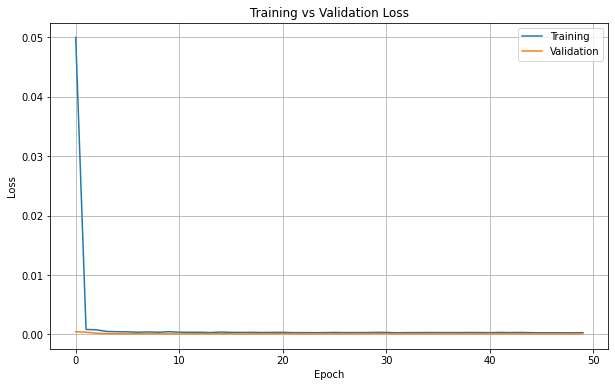

In [7]:
model.plot_loss()

In [8]:
eval = model.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
)
print("Accuracy:", eval["accuracy"])
pd.DataFrame(eval["weighted_class_report"])

Accuracy: 0.9750283768444948


,0,1,macro avg,weighted avg
precision,0.920041,0.952142,0.936091,0.946738
recall,0.754956,0.986720,0.870838,0.947708
f1-score,0.829363,0.969123,0.899243,0.945597
support,0.392325,1.938392,2.330717,2.330717


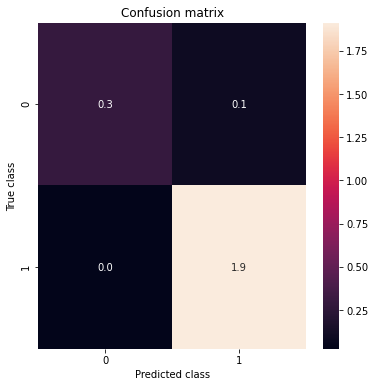

In [9]:
plot_confidence_matrix(eval["weighted_cm"], 6, 6, '.1f')

## Training with class weights

In [10]:
class_weights = {
    0: 2,
    1: 1,
}
class_weights

{0: 2, 1: 1.0}

In [11]:
model_cw = BC1(sets["x"]["train"].shape[1])
model_cw.fit(
    sets["x"]["train"], sets["y"]["train"], sets["w"]["train"],
    sets["x"]["val"], sets["y"]["val"], sets["w"]["val"],
    50, verbose = 2, class_weights = class_weights,
)

Train on 5283 samples, validate on 1761 samples
Epoch 1/50
 - 1s - loss: 0.0032 - val_loss: 6.7531e-04
Epoch 2/50
 - 1s - loss: 0.0012 - val_loss: 5.9352e-04
Epoch 3/50
 - 1s - loss: 0.0012 - val_loss: 3.5348e-04
Epoch 4/50
 - 1s - loss: 0.0011 - val_loss: 2.5983e-04
Epoch 5/50
 - 1s - loss: 8.0192e-04 - val_loss: 4.3101e-04
Epoch 6/50
 - 1s - loss: 7.1719e-04 - val_loss: 1.5231e-04
Epoch 7/50
 - 1s - loss: 6.9533e-04 - val_loss: 2.9346e-04
Epoch 8/50
 - 1s - loss: 6.6573e-04 - val_loss: 2.7780e-04
Epoch 9/50
 - 1s - loss: 5.6182e-04 - val_loss: 1.6422e-04
Epoch 10/50
 - 1s - loss: 5.5378e-04 - val_loss: 2.9885e-04
Epoch 11/50
 - 1s - loss: 5.7617e-04 - val_loss: 2.0400e-04
Epoch 12/50
 - 1s - loss: 4.9513e-04 - val_loss: 1.7270e-04
Epoch 13/50
 - 1s - loss: 5.6188e-04 - val_loss: 1.3937e-04
Epoch 14/50
 - 1s - loss: 5.5605e-04 - val_loss: 2.2841e-04
Epoch 15/50
 - 1s - loss: 5.1268e-04 - val_loss: 1.9015e-04
Epoch 16/50
 - 1s - loss: 4.4506e-04 - val_loss: 1.3509e-04
Epoch 17/50
 - 1s

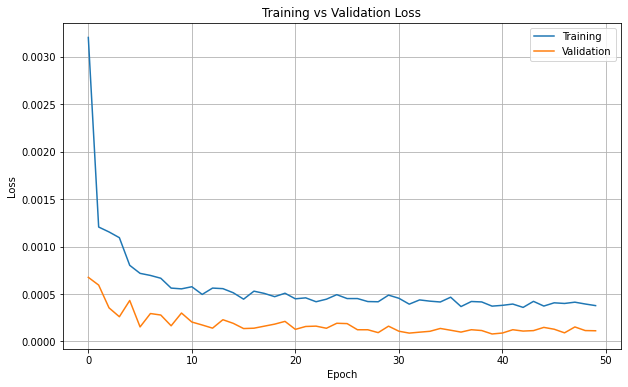

In [12]:
model_cw.plot_loss()

In [13]:
eval_cw = model_cw.complete_evaluation(
    sets["x"]["test"], sets["y"]["test"], sets["w"]["test"], 0.4,
)
print("Accuracy:", eval_cw["accuracy"])
pd.DataFrame(eval_cw["weighted_class_report"])

Accuracy: 0.9580022701475596


,0,1,macro avg,weighted avg
precision,0.850689,0.975042,0.912865,0.954110
recall,0.877474,0.968828,0.923151,0.953451
f1-score,0.863874,0.971925,0.917900,0.953737
support,0.392325,1.938392,2.330717,2.330717


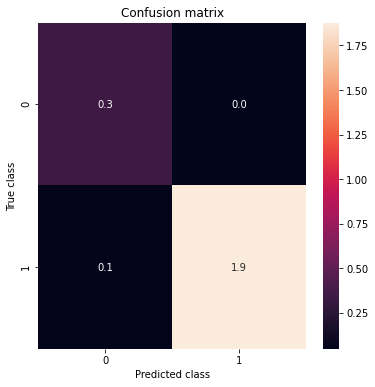

In [14]:
plot_confidence_matrix(eval_cw["weighted_cm"], 6, 6, '.1f')

### Analysis
If we increase the class weight of the background, recall increase and precision decreases. This occurs because the model starts predicting more background, missing some signals and getting more background right.